<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 항공 탑승자 만족도 예측

<img src = "https://github.com/Jangrae/img/blob/master/airport2.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- id : 탑승자 고유 아이디
- gender: 성별 (Female, Male)
- customer_type: 고액 유형 (Loyal customer, disloyal customer)
- age: 탑승자 나이
- type_of_travel: 비행 목적(Personal Travel, Business Travel)
- class: 등급 (Business, Eco, Eco Plus)
- flight_distance: 비행 거리
- inflight_wifi_service: 와아파이 서비스 만족도 (0:N/A; 1-5)
- departure/arrival_time_convenient: 출발, 도착 시간 만족도 (0:N/A; 1-5)
- ease_of_online_booking: 온라인 부킹 만족도 (0:N/A; 1-5)
- gate_location: 게이트 위치 만족도 (0:N/A; 1-5)
- food_and_drink: 식사와 음료 만족도 (0:N/A; 1-5)
- online_boarding: 온라인 보딩 만족도 (0:N/A; 1-5)
- seat_comfort: 좌석 편안함 만족도 (0:N/A; 1-5)
- inflight_entertainment: 기내 엔터테인먼트 만족도 (0:N/A; 1-5)
- on-board_service: 온 보드 서비스 만족도 (0:N/A; 1-5)
- leg_room_service: 다리 공간 만족도 (0:N/A; 1-5)
- baggage_handling: 수하물 처리 만족도 (0:N/A; 1-5)
- check-in_service: 체크인 서비스 만족도 (0:N/A; 1-5)
- inflight_service: 기내 서비스 만족도 (0:N/A; 1-5)
- cleanliness: 청결 만족도 (0:N/A; 1-5)
- departure_delay_in_minutes: 출발 지연 시간(분)
- arrival_delay_in_minutes: 도착 지연 시간(분)
- satisfaction: 항공 만족도(1: Satisfaction, 0: Neutral or Dissatisfaction) - Target

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [89]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [90]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airline_satisfaction_small.csv'
path = 'https://bit.ly/AirlineFile'
data = pd.read_csv(path)

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [91]:
# 상위 몇 개 행 확인
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [92]:
# 하위 몇 개 행 확인
data.tail()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
2575,21840,Male,Loyal Customer,63,Business travel,Business,448,2,2,2,...,4,4,5,4,3,4,4,15,8.0,1
2576,42486,Female,disloyal Customer,26,Business travel,Eco,693,3,3,3,...,3,5,5,1,1,1,3,0,0.0,0
2577,49355,Male,Loyal Customer,41,Business travel,Business,3306,5,5,5,...,5,5,5,5,2,5,2,28,24.0,1
2578,46728,Female,Loyal Customer,17,Personal Travel,Eco,125,3,2,0,...,5,4,4,3,3,3,5,0,0.0,0
2579,34516,Female,Loyal Customer,36,Personal Travel,Eco,1521,2,2,2,...,5,3,4,3,3,3,5,0,4.0,0


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [93]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2580 non-null   int64  
 1   gender                             2580 non-null   object 
 2   customer_type                      2580 non-null   object 
 3   age                                2580 non-null   int64  
 4   type_of_travel                     2580 non-null   object 
 5   class                              2580 non-null   object 
 6   flight_distance                    2580 non-null   int64  
 7   inflight_wifi_service              2580 non-null   int64  
 8   departure/arrival_time_convenient  2580 non-null   int64  
 9   ease_of_online_booking             2580 non-null   int64  
 10  gate_location                      2580 non-null   int64  
 11  food_and_drink                     2580 non-null   int64

**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [94]:
# 기초통계정보 확인
data.describe()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2574.000000,2580.000000
mean,65179.742248,39.229845,1204.824806,2.732558,3.041473,2.758527,2.973256,3.229457,3.242248,3.440310,3.329070,3.361628,3.298450,3.599225,3.318992,3.620155,3.277907,14.856202,15.285159,0.427132
std,37320.994433,15.295065,1008.852185,1.317032,1.542290,1.400792,1.271752,1.341635,1.341842,1.329681,1.334021,1.266627,1.313897,1.168210,1.256309,1.182093,1.317367,35.808534,36.301790,0.494758
min,54.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32988.750000,26.000000,405.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64877.000000,40.000000,860.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97717.000000,51.000000,1754.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.000000,1.000000
max,129860.000000,85.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,435.000000,470.000000,1.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [95]:
# 결측치 확인
data.isna().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             6
satisfaction                         0
dtype: int64

**5) 상관관계 확인**

- 변수들 간의 상관관계를 확인합니다.

In [96]:
# 상관분석
data.corr()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
id,1.000000,-0.015368,0.099408,-0.027930,-0.011158,-0.006361,-0.014071,0.045138,0.031230,0.053638,0.002769,0.029071,0.041225,0.056449,0.047594,0.067987,0.038136,0.018539,-0.005068,-0.003974
age,-0.015368,1.000000,0.078047,0.010329,0.064441,0.018626,0.009466,0.034049,0.197814,0.177556,0.052257,0.026791,0.024620,-0.073139,0.050525,-0.087237,0.059583,-0.037540,-0.034144,0.115479
flight_distance,0.099408,0.078047,1.000000,0.034791,-0.002179,0.057450,0.016260,0.067810,0.233310,0.151401,0.141815,0.111265,0.143432,0.055050,0.035266,0.053794,0.096767,-0.006341,-0.025196,0.305260
inflight_wifi_service,-0.027930,0.010329,0.034791,1.000000,0.320624,0.717404,0.356636,0.115497,0.451573,0.097381,0.200623,0.129821,0.198738,0.134191,0.023225,0.103834,0.122191,0.030221,0.023121,0.259875
departure/arrival_time_convenient,-0.011158,0.064441,-0.002179,0.320624,1.000000,0.439331,0.459399,0.014700,0.059034,0.018130,0.015226,0.064172,0.035029,0.062816,0.093228,0.072874,0.025242,0.012647,0.012714,-0.059302
ease_of_online_booking,-0.006361,0.018626,0.057450,0.717404,0.439331,1.000000,0.508303,0.034033,0.384504,0.017968,0.050631,0.027163,0.138610,0.046280,-0.006889,0.032867,0.011795,0.023704,0.017871,0.158390
gate_location,-0.014071,0.009466,0.016260,0.356636,0.459399,0.508303,1.000000,-0.016628,0.019022,-0.028575,0.009760,-0.013491,0.018238,0.026451,-0.036886,-0.007018,0.000272,0.013530,0.013358,0.021243
food_and_drink,0.045138,0.034049,0.067810,0.115497,0.014700,0.034033,-0.016628,1.000000,0.239849,0.586710,0.611201,0.088740,0.030205,0.008476,0.059618,0.034685,0.642026,-0.008821,-0.013381,0.208037
online_boarding,0.031230,0.197814,0.233310,0.451573,0.059034,0.384504,0.019022,0.239849,1.000000,0.419603,0.279503,0.143723,0.145477,0.079027,0.184845,0.080524,0.329533,-0.025518,-0.034461,0.475447
seat_comfort,0.053638,0.177556,0.151401,0.097381,0.018130,0.017968,-0.028575,0.586710,0.419603,1.000000,0.599424,0.146237,0.111184,0.047997,0.170750,0.055629,0.691808,-0.027148,-0.030866,0.338773


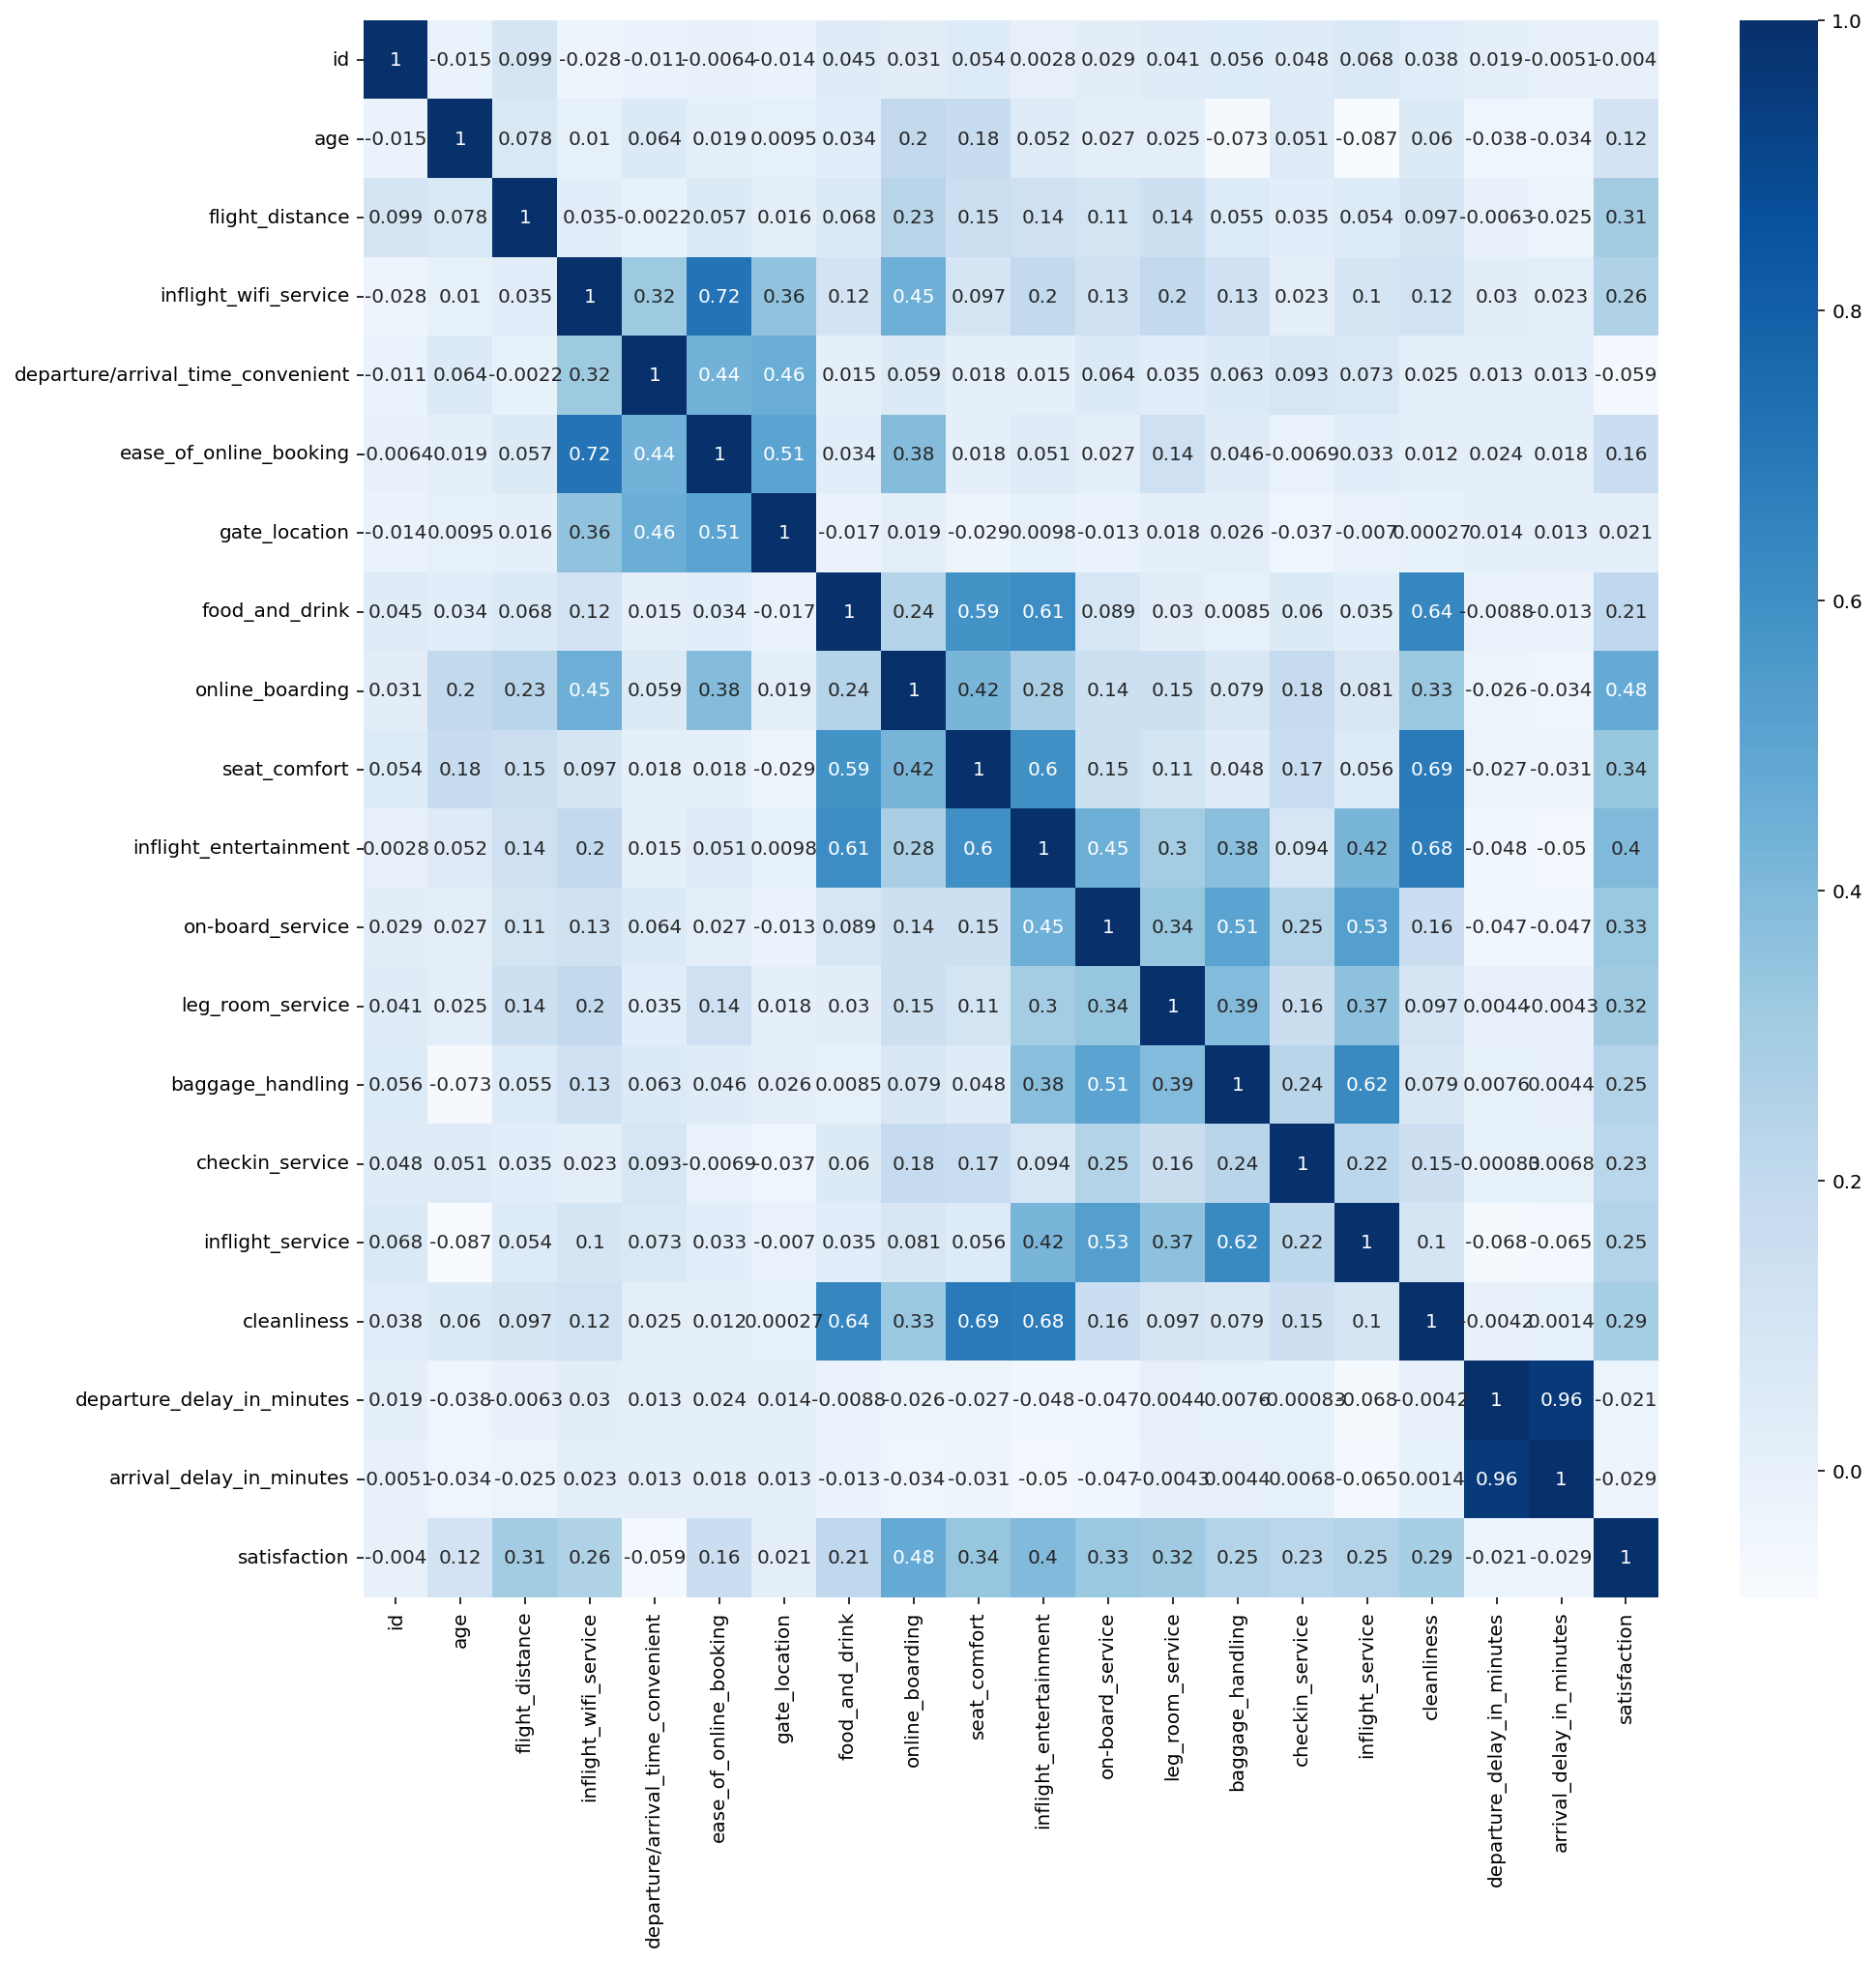

In [97]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

**6) 범주값 변수 확인**

- 범주형 변수를 식별해 목록을 작성하고, 그 변수들이 어떤 범주값을 몇 개씩 갖는지 확인합니다.
    - 범주형 변수: gender, customer_type, type_of_travel, class, satisfaction

In [98]:
# 범주값 개수 확인
print(data['gender'].value_counts())
print(data['customer_type'].value_counts())
print(data['type_of_travel'].value_counts())
print(data['class'].value_counts())
print(data['satisfaction'].value_counts())


Female    1335
Male      1245
Name: gender, dtype: int64
Loyal Customer       2119
disloyal Customer     461
Name: customer_type, dtype: int64
Business travel    1772
Personal Travel     808
Name: type_of_travel, dtype: int64
Business    1258
Eco         1129
Eco Plus     193
Name: class, dtype: int64
0    1478
1    1102
Name: satisfaction, dtype: int64


**7) 주요 변수 확인**

7-1) satisfaction 변수 범주 값 개수를 막대그래프로 시각화해 확인합니다.

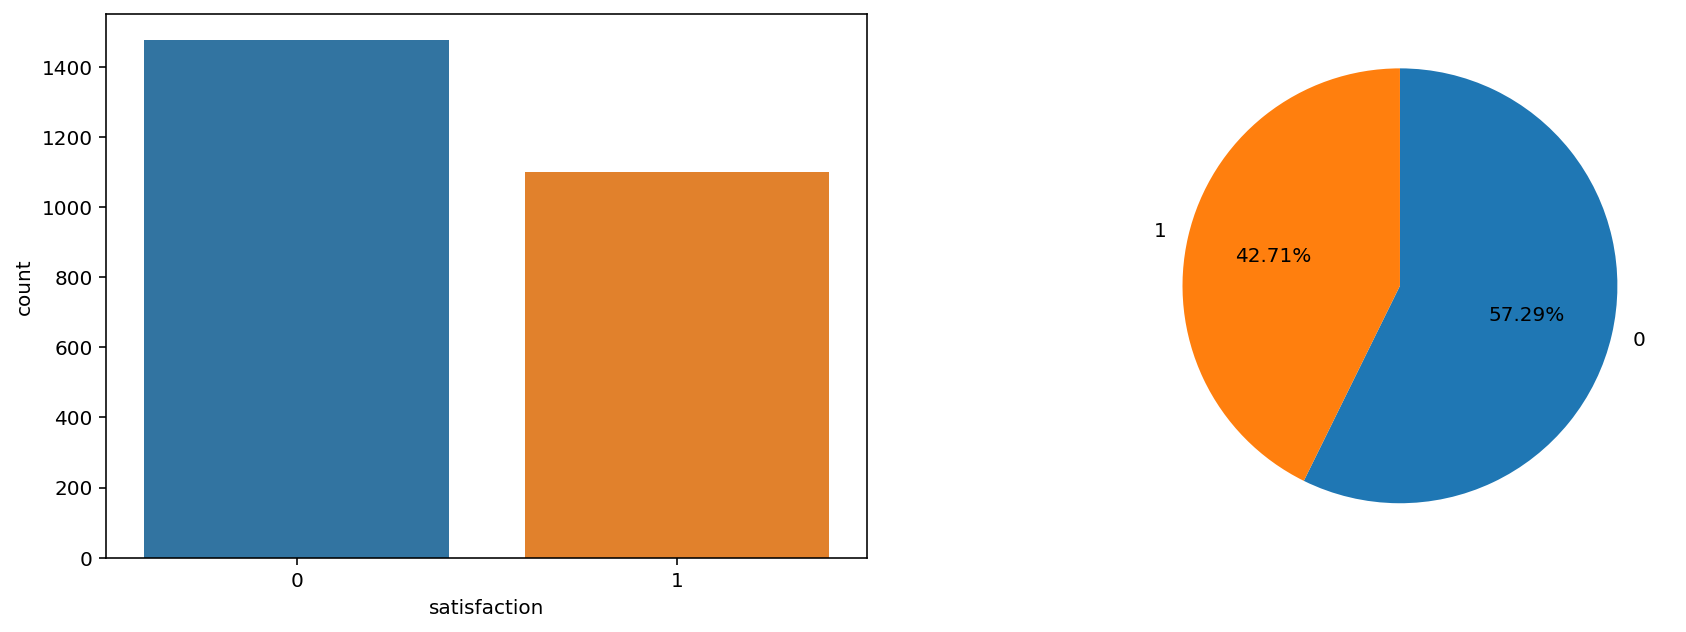

In [99]:
# satisfaction 값 분포
var = 'satisfaction'
cnt = data[var].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data[var])

plt.subplot(1,2,2)
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

- (의견) 만족한다는 의견이 더 적다.
- (의견) 57%의 사람이 만족하지 못한다는 의견을 가지고 있는 것으로 보아 대책마련이 필요하다.

7-2) type_of_travel 변수 범주 값  개수를 막대그래프로 시각화해 확인합니다.

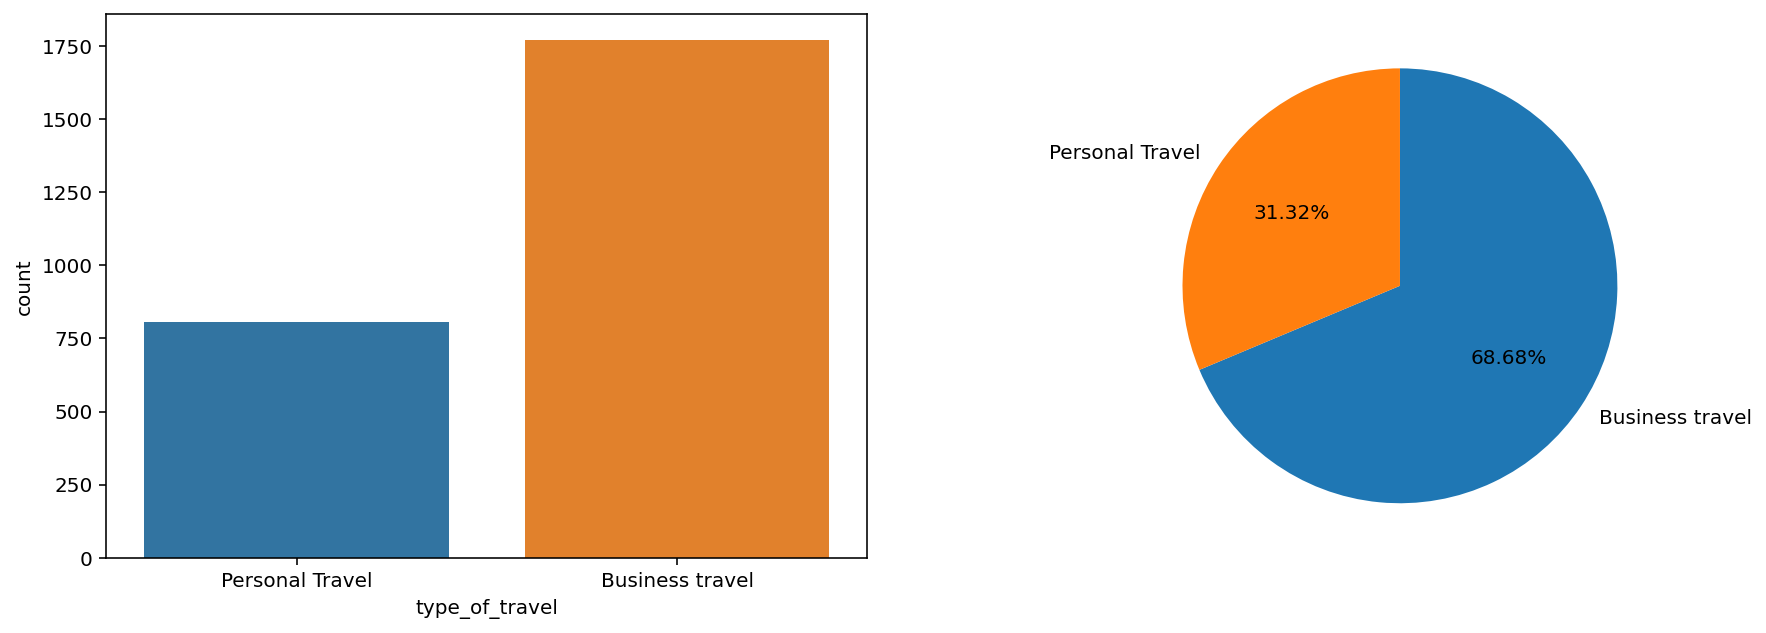

In [100]:
# type_of_travel 값 분포
var = 'type_of_travel'
cnt = data[var].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data[var])

plt.subplot(1,2,2)
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

- (의견) 개인보다 비지니스 여행객이 대부분이다.
- (의견) 전체 데이터의 68%가량이 비지니스 고객이며 여행종류를 구별하여 이에따른 만족도 전략을 수립할 필요가 있다.

7-3) age 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

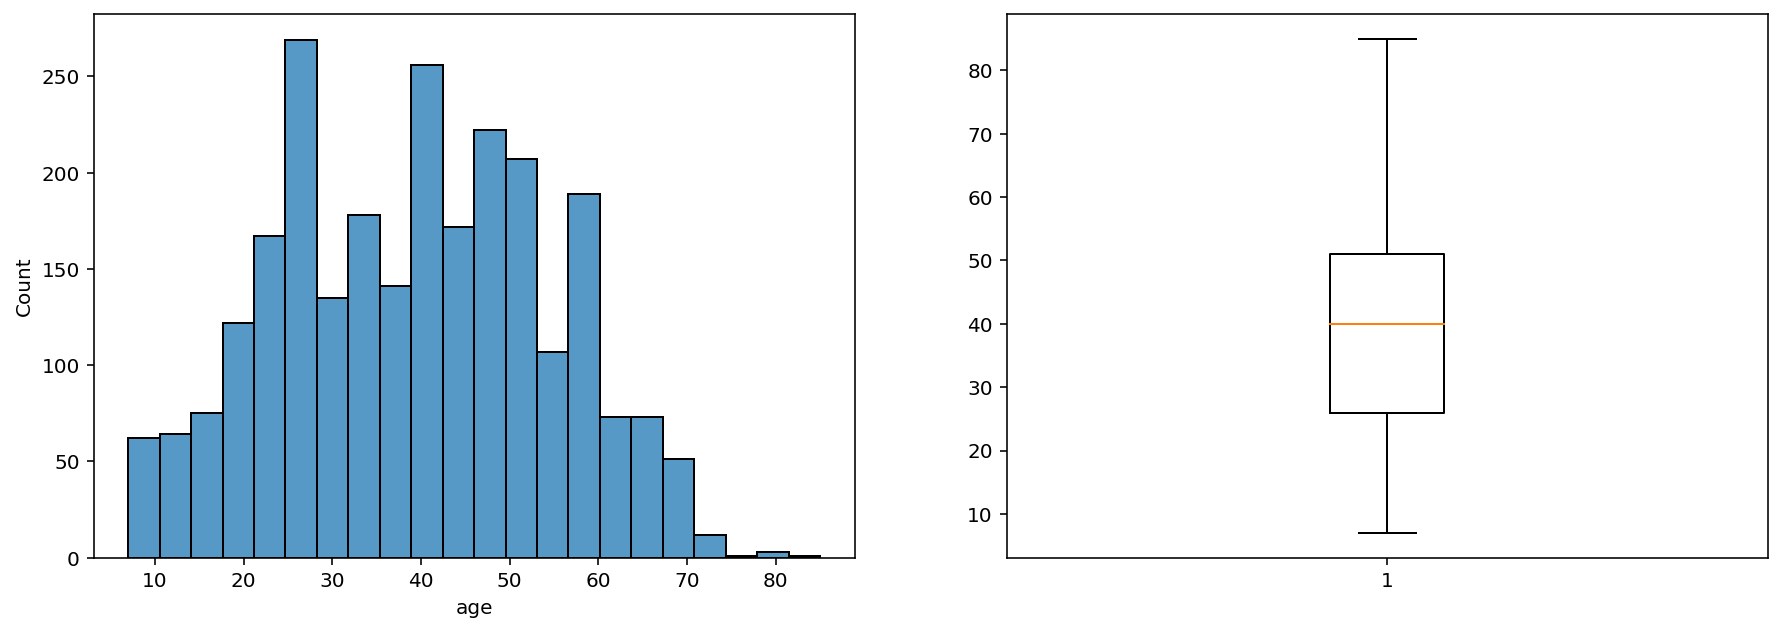

[26.  7.]
[51. 85.]


In [23]:
# age 값 분포
var = 'age'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data[var])

plt.subplot(1,2,2)
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())


- (의견) 26~51세 고객이 전체의 절반을 차지한다..
- (의견) 51세 이하고객이 전체의 75%가량을 차지하며 이 고객들에 대한 맞춤전략을 통해 만족도를 끌어올릴 수 있을것으로 예상된다.

# 3.데이터 준비


- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 불필요한 변수 제거**

- 불필요한 변수와 의미가 적어 보이는 다음 변수들을 제거합니다.
    - id, departure/arrival_time_convenient, gate_location, departure_delay_in_minutes, arrival_delay_in_minutes

In [25]:
# id 변수 제거
cols = ['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes']
data.drop(cols, axis=1, inplace=True)

# 확인
data.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


**2) 결측치 처리**

- arrival_delay_in_minutes 열에 결측지가 있습니다.
- 몇 건 안되니 결측치가 있는 행은 제거합니다.

In [27]:
# 결측치 제거
data.dropna(inplace=True)

# 확인
data.isna().sum()

gender                      0
customer_type               0
age                         0
type_of_travel              0
class                       0
flight_distance             0
inflight_wifi_service       0
ease_of_online_booking      0
food_and_drink              0
online_boarding             0
seat_comfort                0
inflight_entertainment      0
on-board_service            0
leg_room_service            0
baggage_handling            0
checkin_service             0
inflight_service            0
cleanliness                 0
arrival_delay_in_minutes    0
satisfaction                0
dtype: int64

**3) 가변수화**

- 왜 x의 다음 변수들이 가변수화 대상이 되는지 파악한 후 가변수화를 진행합니다.
    - gender, customer_type, type_of_travel, class

In [28]:
# 가변수화
cols = ['gender', 'customer_type', 'type_of_travel', 'class']
data = pd.get_dummies(data, columns=cols, drop_first=True)

# 확인
data.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,...,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,...,4,5,5,18.0,0,1,0,1,0,1
1,25,235,3,3,1,3,1,1,1,5,...,1,4,1,6.0,0,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,...,4,4,5,0.0,1,0,0,0,0,0
3,25,562,2,5,2,2,2,2,2,5,...,1,4,2,9.0,0,0,0,0,0,0
4,61,214,3,3,4,5,5,3,3,4,...,3,3,3,0.0,1,1,0,0,0,0


**4) x, y 분리**

- satisfaction 변수가 Target입니다.
- x, y가 분리된 이후부터 y는 절대로 건드지지 않아야 합니다.

In [30]:
# target 확인
target = 'satisfaction'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**5) 정규화**

- x의 모든 변수를 정규화합니다.

In [32]:
# 정규화
x = (x-x.min())/(x.max()-x.min())

# 확인
x.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,0.076923,0.080270,0.6,0.6,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.75,1.0,1.00,0.038298,1.0,0.0,1.0,0.0,1.0
1,0.230769,0.034314,0.6,0.6,0.2,0.6,0.00,0.2,0.2,1.0,0.50,0.00,0.8,0.00,0.012766,1.0,1.0,0.0,0.0,0.0
2,0.243590,0.219567,0.4,0.4,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.75,0.8,1.00,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.230769,0.101103,0.4,1.0,0.4,0.4,0.25,0.4,0.4,1.0,0.50,0.00,0.8,0.25,0.019149,0.0,0.0,0.0,0.0,0.0
4,0.692308,0.030025,0.6,0.6,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.50,0.6,0.50,0.000000,1.0,0.0,0.0,0.0,0.0


**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [33]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.KNN

### 4.1.1. 모델링

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [34]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [101]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [102]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [103]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [104]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[424  19]
 [ 58 272]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       443
           1       0.93      0.82      0.88       330

    accuracy                           0.90       773
   macro avg       0.91      0.89      0.90       773
weighted avg       0.90      0.90      0.90       773



### 4.1.2. 성능 정보 수집

- 모델 각각의 성능을 모아 마지막에 비교하기 위해 아래 구문을 수행해 성능 정보를 score 변수에 저장합니다.

In [39]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score

score={}
score['Linear Regression'] = accuracy_score(y_test, y_pred)

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [40]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier


In [41]:
# 2단계: 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [42]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [44]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [45]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[397  46]
 [ 41 289]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       443
           1       0.86      0.88      0.87       330

    accuracy                           0.89       773
   macro avg       0.88      0.89      0.89       773
weighted avg       0.89      0.89      0.89       773



### 4.2.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [47]:
# 중요도 확인
print(model.feature_names_in_)
print(model.feature_importances_)

['age' 'flight_distance' 'inflight_wifi_service' 'ease_of_online_booking'
 'food_and_drink' 'online_boarding' 'seat_comfort'
 'inflight_entertainment' 'on-board_service' 'leg_room_service'
 'baggage_handling' 'checkin_service' 'inflight_service' 'cleanliness'
 'arrival_delay_in_minutes' 'gender_Male'
 'customer_type_disloyal Customer' 'type_of_travel_Personal Travel'
 'class_Eco' 'class_Eco Plus']
[0.04053097 0.04717893 0.14992541 0.00352718 0.00835257 0.34103811
 0.01409921 0.07917043 0.01372986 0.00756916 0.00976572 0.0299972
 0.00932092 0.02206727 0.01547393 0.         0.03804921 0.16079078
 0.00635049 0.00306266]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

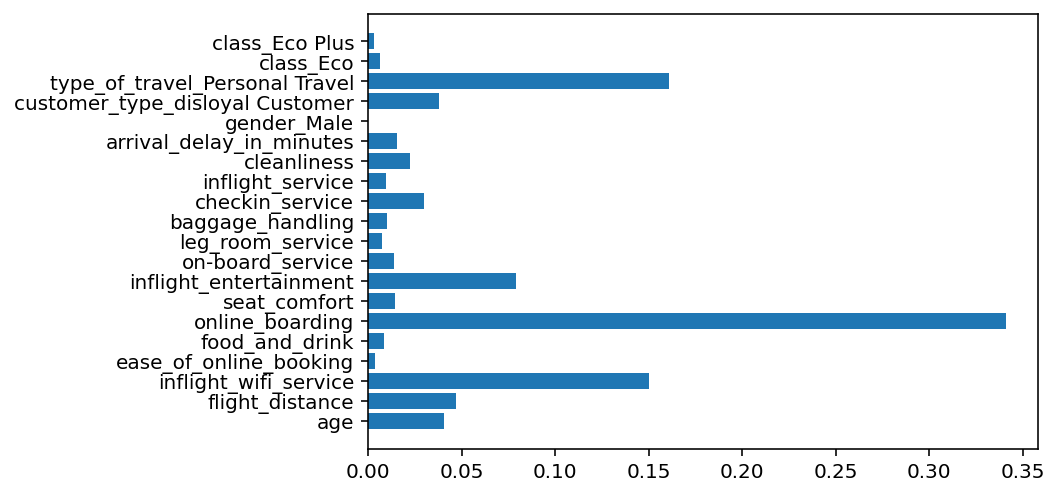

In [48]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- (의견) 온라인 보딩은 항공 만족도에 가장 영향이 크다.
- (의견) 모델에서 와이파이서비스와 여행종류는 사람들은 만족하는 정도에 영향을 준다.

### 4.2.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [49]:
# 성능 정보 수집
score['Decision Tree'] = accuracy_score(y_test, y_pred)

## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [50]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier

In [51]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [52]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [53]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [54]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[419  24]
 [ 34 296]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       443
           1       0.93      0.90      0.91       330

    accuracy                           0.92       773
   macro avg       0.92      0.92      0.92       773
weighted avg       0.92      0.92      0.92       773



### 4.3.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [55]:
# 중요도 확인
print(model.feature_names_in_)
print(model.feature_importances_)

['age' 'flight_distance' 'inflight_wifi_service' 'ease_of_online_booking'
 'food_and_drink' 'online_boarding' 'seat_comfort'
 'inflight_entertainment' 'on-board_service' 'leg_room_service'
 'baggage_handling' 'checkin_service' 'inflight_service' 'cleanliness'
 'arrival_delay_in_minutes' 'gender_Male'
 'customer_type_disloyal Customer' 'type_of_travel_Personal Travel'
 'class_Eco' 'class_Eco Plus']
[0.0478066  0.0571299  0.11605022 0.04261728 0.01677401 0.14443124
 0.05120355 0.06557354 0.03270252 0.04072262 0.02480892 0.02631766
 0.02083523 0.03348183 0.02368498 0.00773758 0.03597169 0.12277202
 0.08303822 0.00634039]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

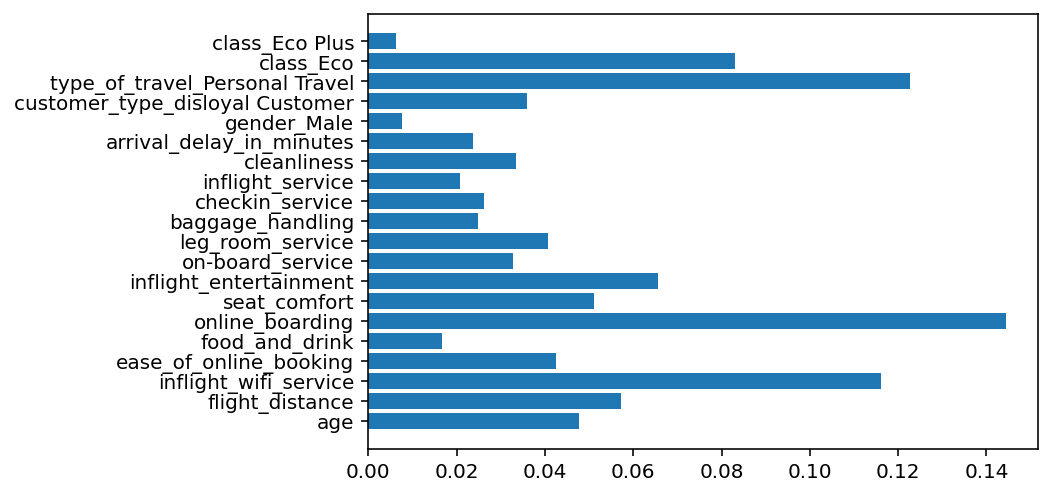

In [56]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()


- (의견) 온라인보딩, 와이파이서비스, 여행종류가 만족도에 가장 큰 영향을 미친다.
- (의견) 모델에서 좌석 종유와 비행거리도 어느정도 영향을 미친다.

### 4.3.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [57]:
# 성능 정보 수집
score['Random Forest'] = accuracy_score(y_test, y_pred)

## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [58]:
# 1단계: 불러오기
from xgboost import XGBClassifier


In [72]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022, eval_metric='logloss')

In [73]:
# 3단계: 학습하기
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [75]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[425  18]
 [ 31 299]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       443
           1       0.94      0.91      0.92       330

    accuracy                           0.94       773
   macro avg       0.94      0.93      0.93       773
weighted avg       0.94      0.94      0.94       773



### 4.4.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [64]:
# 중요도 확인
print(model.feature_importances_)

[0.01303819 0.00812713 0.08274984 0.02049681 0.02103555 0.29923883
 0.03023352 0.05858029 0.02421418 0.0258929  0.02683791 0.02264929
 0.01095796 0.0305847  0.01446378 0.01316585 0.0704421  0.19866794
 0.02862328 0.        ]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

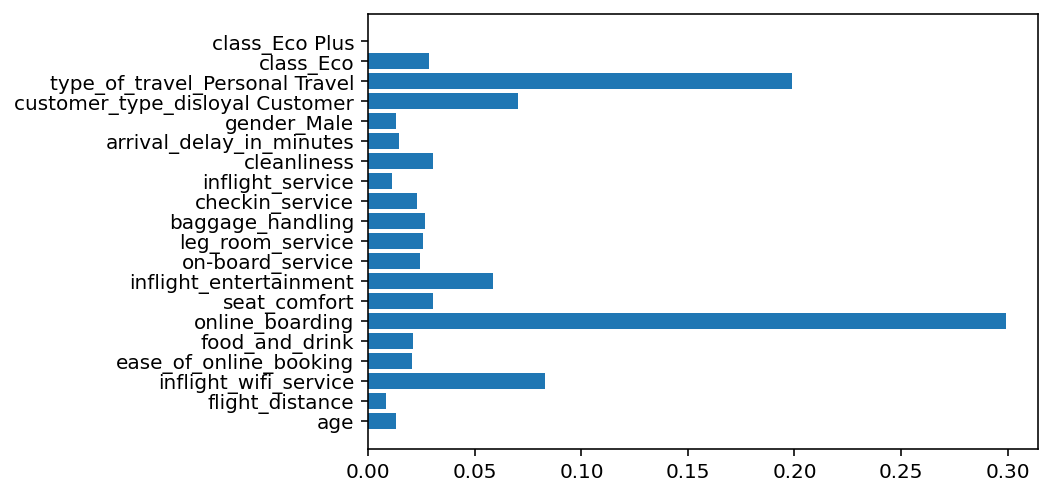

In [65]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- (의견) 여행종류와 와이파이서비스에도 영향을 받는다.
- (의견) 전체적으로 가장 많이 영향을 받는 변수는 온라인 보딩이다.

### 4.4.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [66]:
# 성능 정보 수집
score['XGBoost'] = accuracy_score(y_test, y_pred)

In [70]:
score.values()

dict_values([0.9003880983182406, 0.88745148771022, 0.92496765847348, 0.9366106080206986])

# 5.정리

- 앞에서 수집한 성능 정보를 시각화해 확인합니다.

-Linear Regression: 0.9004
-Decision Tree: 0.8875
-Random Forest: 0.9250
-XGBoost: 0.9366


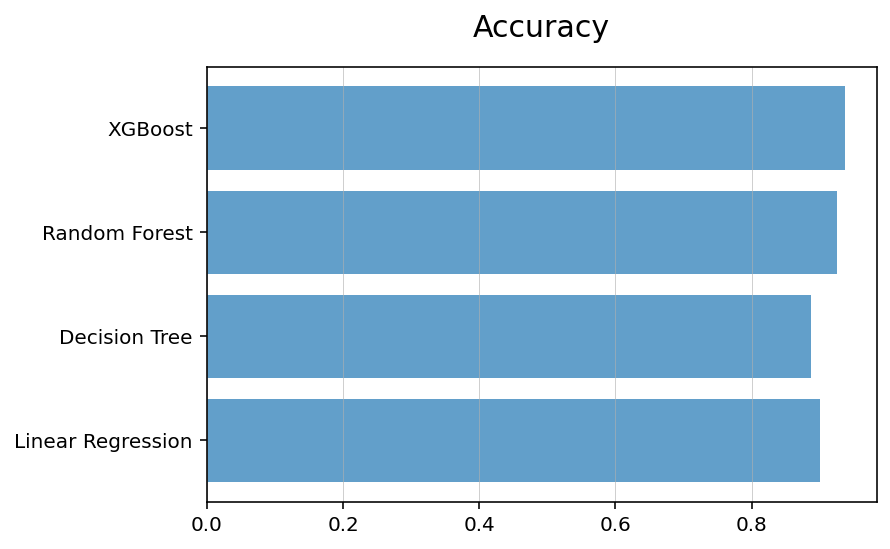

In [71]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시작화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- (의견) XGBoost의 모델의 성능이 가장 높다.
- (의견) 모델 전부 online boarding의 영향력이 가장 높았다.
- (의견) 여행종류에도 어느정도 영향을 받는데 이부분은 나누어 분석해볼 필요가 있다.

# 6.(옵션) 튜닝

- 마음에 드는 모델을 선택하여 튜닝을 진행합니다.

In [76]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'logloss'}

In [77]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param = {'max_depth':range(1,51), 'n_estimators':range(50,250,10)}
model_X = XGBClassifier(random_state=2022, eval_metric='logloss')
model = RandomizedSearchCV(model_X, param, cv=10, n_iter=20, scoring='accuracy')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[421  22]
 [ 29 301]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       443
           1       0.93      0.91      0.92       330

    accuracy                           0.93       773
   macro avg       0.93      0.93      0.93       773
weighted avg       0.93      0.93      0.93       773



In [79]:
print(model.cv_results_['param_max_depth'])
print(model.cv_results_['mean_test_score'])
print('-'*50)
print(model.best_params_)
print(model.best_score_)

[50 21 11 6 12 39 6 23 23 39 27 21 23 25 27 37 23 32 42 12]
[0.94171578 0.94171885 0.94282075 0.94393493 0.94282075 0.94282689
 0.94226519 0.94116329 0.94171885 0.94337937 0.94171578 0.94227133
 0.94282689 0.94116329 0.94116329 0.94338551 0.94449048 0.94449048
 0.94171885 0.94226519]
--------------------------------------------------
{'n_estimators': 80, 'max_depth': 23}
0.9444904849600981


In [83]:
param = {'max_depth':range(10,21), 'n_estimators':range(60,101,10)}
model_X = XGBClassifier(random_state=2022, eval_metric='logloss')
model = GridSearchCV(model_X, param, cv=10, n_jobs=-1, scoring='accuracy')
model.fit(x_train, y_train)
print(model.cv_results_['param_max_depth'])
print(model.cv_results_['mean_test_score'])
print('-'*50)
print(model.best_params_)
print(model.best_score_)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14
 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19
 19 19 20 20 20 20 20]
[0.94171271 0.9406016  0.94115715 0.94171578 0.94171271 0.94170964
 0.94170964 0.94226519 0.94282075 0.94282075 0.94170964 0.94226519
 0.94393186 0.9433763  0.94282075 0.94393186 0.9433763  0.9433763
 0.94392879 0.94170964 0.94282075 0.94282689 0.9433763  0.9433763
 0.94448435 0.94504604 0.94504604 0.94670964 0.94504604 0.9456016
 0.94282689 0.94226826 0.94393493 0.9422744  0.94282996 0.94338244
 0.94282382 0.94449048 0.94282996 0.94338551 0.94338244 0.94282382
 0.94449048 0.94282996 0.94338551 0.94338244 0.94282382 0.94449048
 0.94282996 0.94338551 0.94338244 0.94282382 0.94449048 0.94282996
 0.94338551]
--------------------------------------------------
{'max_depth': 15, 'n_estimators': 80}
0.94670963781461
[[421  22]
 [ 29 301]]
              precision    recall  f1-score   support

           0       0.94      0.95 

In [84]:
accuracy_score(y_test, y_pred)

0.9340232858990944

-Linear Regression: 0.9004
-Decision Tree: 0.8875
-Random Forest: 0.9250
-XGBoost: 0.9366
-GVXGBoost: 0.9340


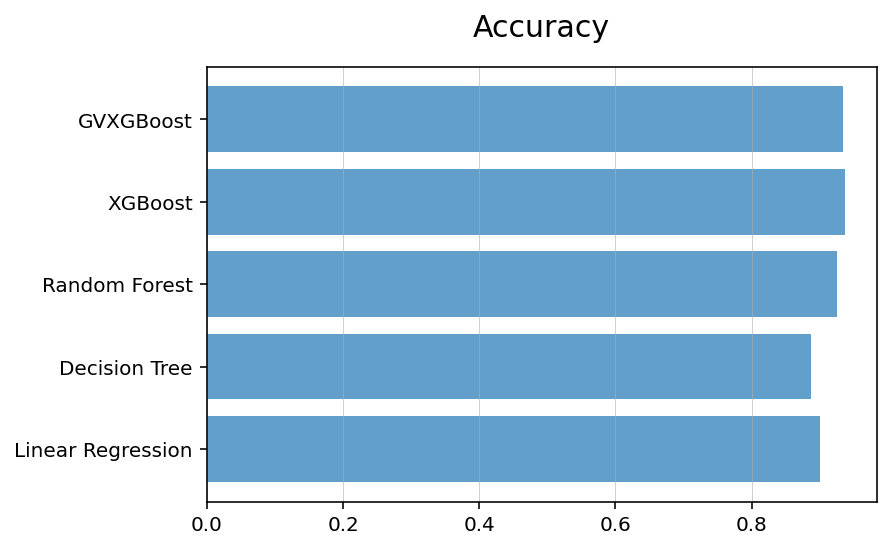

In [85]:
# 스코어 추가
score['GVXGBoost'] = accuracy_score(y_test, y_pred)
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시작화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- (의견) XGBoost 튜닝결과 커다란 차이는 나타나지 않았다.
- (의견) 모델의 정확도 성능이 높은 편이다.
- (의견) 모델의 정밀도를 기준으로 높여서 불만족고객을 분리하고 이를 대상으로 프로모션을 진행해볼 필요가 있다.